In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Electric Consumption Task Perform Regression

Regression: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Classification:https://archive.ics.uci.edu/ml/datasets/Census+Income

Data ingestion EDA Preprocessing Pickling for the preprocessing object(save the preprocessing model) After preprocessing you have to store data inside MONGODB

You have to load the data from mongo db Model

Regression:linear regression,ridge regression,lasso regression,elastic net, support vector regression

Classification: logistic regression,SVM(kernel)

Hyperparameter tuning is mandatory(GRID SEARCH CV)

Evaluation of the model Regression evaluation matrix: R2 and adjusted R2 Classification confusion matrix, ROC AUC score

USE IDE: jupyter notebook

# Targeting Global active power

In [2]:
df=pd.read_csv(r"D:\Downloaded files\household_power_consumption.txt", sep=";")

C:\Users\RJ\AppData\Local\Temp\ipykernel_12636\2504633741.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"D:\Downloaded files\household_power_consumption.txt", sep=";")


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df=df.sample(n=40000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 861863 to 1848753
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   40000 non-null  object 
 1   Time                   40000 non-null  object 
 2   Global_active_power    40000 non-null  object 
 3   Global_reactive_power  40000 non-null  object 
 4   Voltage                40000 non-null  object 
 5   Global_intensity       40000 non-null  object 
 6   Sub_metering_1         40000 non-null  object 
 7   Sub_metering_2         40000 non-null  object 
 8   Sub_metering_3         39518 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.1+ MB


In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,6/8/2008,05:47:00,0.968,0.360,238.120,4.200,0.000,1.000,13.0
1182300,16/3/2009,18:24:00,0.484,0.320,241.560,2.400,0.000,1.000,0.0
210728,12/5/2007,01:32:00,0.264,0.144,234.020,1.200,0.000,0.000,0.0
1892756,23/7/2010,03:20:00,1.058,0.046,238.320,4.400,0.000,1.000,0.0
98065,22/2/2007,19:49:00,3.864,0.096,232.980,16.600,0.000,2.000,17.0


In [7]:
df.drop(["Date", "Time"] , axis=1 , inplace=True)

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,0.968,0.360,238.120,4.200,0.000,1.000,13.0
1182300,0.484,0.320,241.560,2.400,0.000,1.000,0.0
210728,0.264,0.144,234.020,1.200,0.000,0.000,0.0
1892756,1.058,0.046,238.320,4.400,0.000,1.000,0.0
98065,3.864,0.096,232.980,16.600,0.000,2.000,17.0


In [9]:
df.duplicated().sum()

595

In [10]:
df.isnull().sum()

Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           482
dtype: int64

In [11]:
df[df["Sub_metering_3"].isnull()]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1988618,?,?,?,?,?,?,NaN
1987885,?,?,?,?,?,?,NaN
303815,?,?,?,?,?,?,NaN
1932400,?,?,?,?,?,?,NaN
1934483,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
1398370,?,?,?,?,?,?,NaN
1930506,?,?,?,?,?,?,NaN
1714764,?,?,?,?,?,?,NaN
303808,?,?,?,?,?,?,NaN


In [12]:
df.replace("?" , pd.NA , inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,0.968,0.360,238.120,4.200,0.000,1.000,13.0
1182300,0.484,0.320,241.560,2.400,0.000,1.000,0.0
210728,0.264,0.144,234.020,1.200,0.000,0.000,0.0
1892756,1.058,0.046,238.320,4.400,0.000,1.000,0.0
98065,3.864,0.096,232.980,16.600,0.000,2.000,17.0


In [16]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [17]:
for i in df.columns:
   if df[i].dtype=="O" :
     df[i]=df[i].astype(float)
   

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39518 entries, 861863 to 1848753
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    39518 non-null  float64
 1   Global_reactive_power  39518 non-null  float64
 2   Voltage                39518 non-null  float64
 3   Global_intensity       39518 non-null  float64
 4   Sub_metering_1         39518 non-null  float64
 5   Sub_metering_2         39518 non-null  float64
 6   Sub_metering_3         39518 non-null  float64
dtypes: float64(7)
memory usage: 2.4 MB


In [19]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,0.968,0.360,238.12,4.2,0.0,1.0,13.0
1182300,0.484,0.320,241.56,2.4,0.0,1.0,0.0
210728,0.264,0.144,234.02,1.2,0.0,0.0,0.0
1892756,1.058,0.046,238.32,4.4,0.0,1.0,0.0
98065,3.864,0.096,232.98,16.6,0.0,2.0,17.0


In [20]:
df_copy=df.copy()

In [21]:
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,0.968,0.360,238.12,4.2,0.0,1.0,13.0
1182300,0.484,0.320,241.56,2.4,0.0,1.0,0.0
210728,0.264,0.144,234.02,1.2,0.0,0.0,0.0
1892756,1.058,0.046,238.32,4.4,0.0,1.0,0.0
98065,3.864,0.096,232.98,16.6,0.0,2.0,17.0


In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39518 entries, 861863 to 1848753
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    39518 non-null  float64
 1   Global_reactive_power  39518 non-null  float64
 2   Voltage                39518 non-null  float64
 3   Global_intensity       39518 non-null  float64
 4   Sub_metering_1         39518 non-null  float64
 5   Sub_metering_2         39518 non-null  float64
 6   Sub_metering_3         39518 non-null  float64
dtypes: float64(7)
memory usage: 2.4 MB


In [24]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,39518.0,1.091103,1.063701,0.078,0.308,0.60,1.524,9.322
Global_reactive_power,39518.0,0.123909,0.112668,0.000,0.048,0.10,0.194,1.080
Voltage,39518.0,240.835475,3.251812,225.330,239.020,241.01,242.870,253.420
Global_intensity,39518.0,4.625690,4.473239,0.200,1.400,2.60,6.400,40.800
Sub_metering_1,39518.0,1.144086,6.165222,0.000,0.000,0.00,0.000,79.000
Sub_metering_2,39518.0,1.297409,5.797372,0.000,0.000,0.00,1.000,77.000
Sub_metering_3,39518.0,6.487702,8.442187,0.000,0.000,1.00,17.000,31.000


In [25]:
df_copy.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.240895,-0.401721,0.998890,0.493911,0.443681,0.642771
Global_reactive_power,0.240895,1.000000,-0.118136,0.259759,0.123940,0.135285,0.092624
Voltage,-0.401721,-0.118136,1.000000,-0.413333,-0.207788,-0.162943,-0.270663
Global_intensity,0.998890,0.259759,-0.413333,1.000000,0.499551,0.449087,0.630542
Sub_metering_1,0.493911,0.123940,-0.207788,0.499551,1.000000,0.065436,0.109856
Sub_metering_2,0.443681,0.135285,-0.162943,0.449087,0.065436,1.000000,0.092349
Sub_metering_3,0.642771,0.092624,-0.270663,0.630542,0.109856,0.092349,1.000000


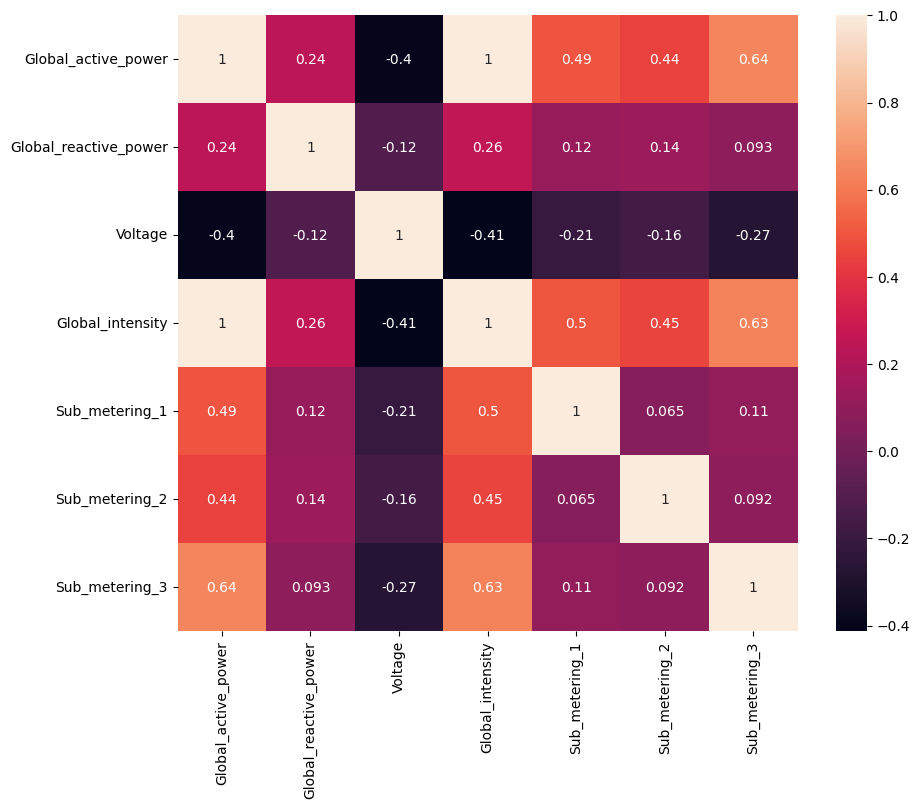

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr() , annot=True ,linecolor="red")
plt.show()

<Figure size 1000x800 with 0 Axes>

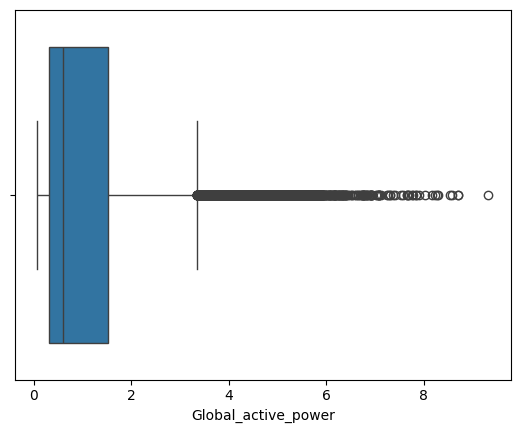

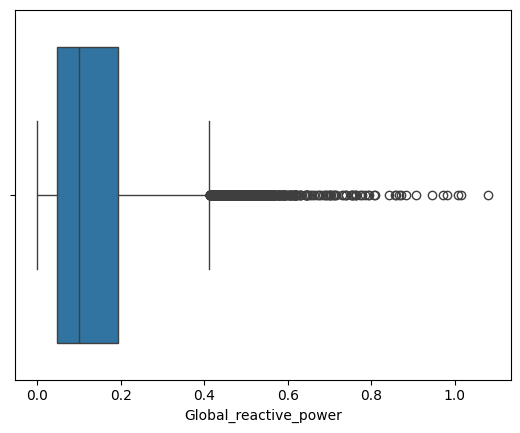

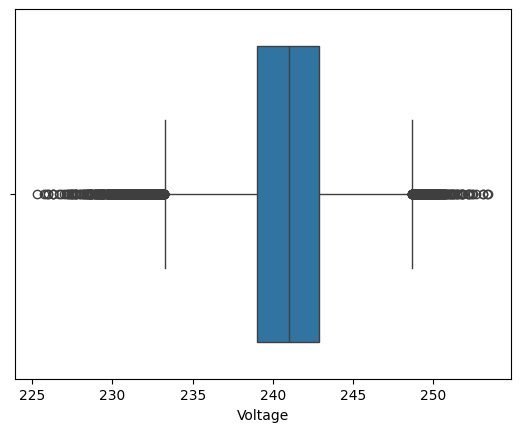

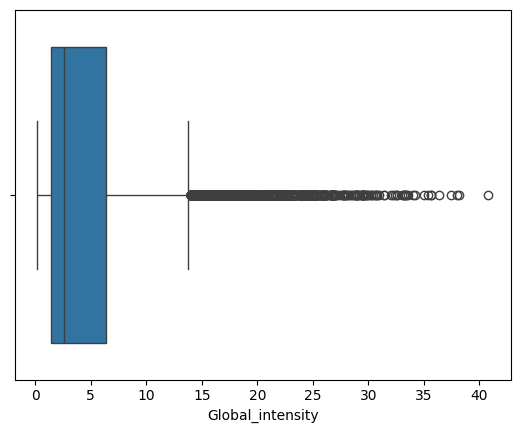

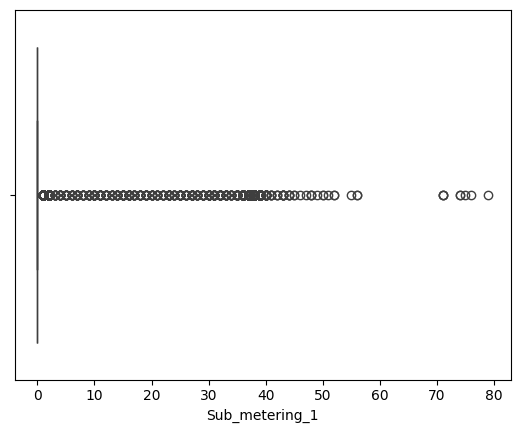

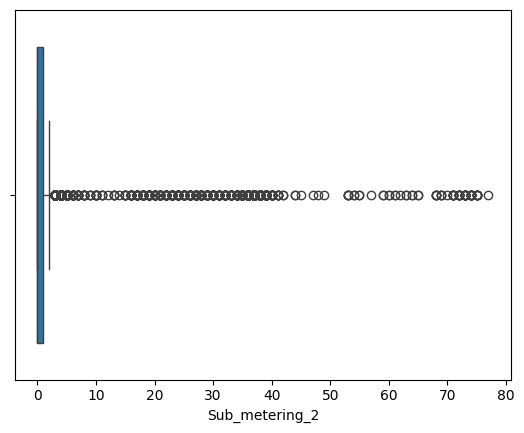

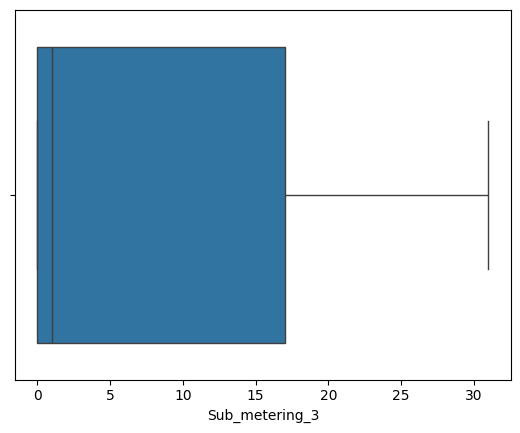

In [27]:
plt.figure(figsize=(10,8))
for i in df_copy.columns:
    plt.subplots()
    sns.boxplot(x=df_copy[i])
plt.show()

In [28]:
for i in df_copy.columns:
    q1=df_copy[i].quantile(0.25)
    q3=df_copy[i].quantile(0.75)
    iqr=q3 - q1
    lower_limit=q1 - 1.5 *iqr
    higher_limit=q3 +1.5 *iqr
    median_value=df_copy[i].median()
    df_copy[i]=np.where((df_copy[i] <lower_limit) | (df_copy[i] >higher_limit) , median_value , df_copy[i])

<Figure size 1000x800 with 0 Axes>

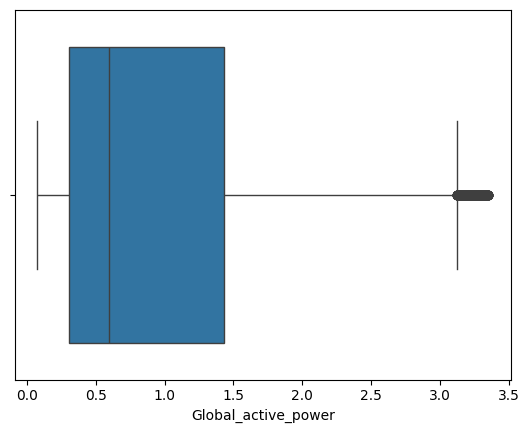

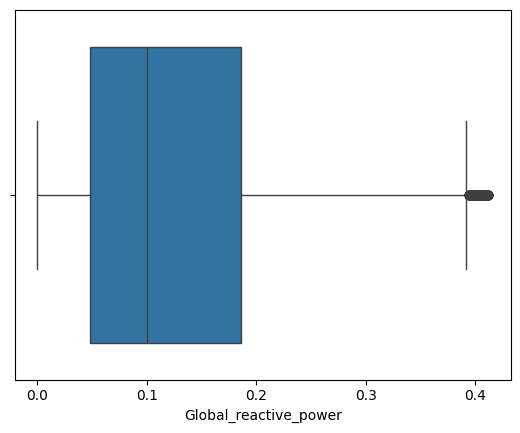

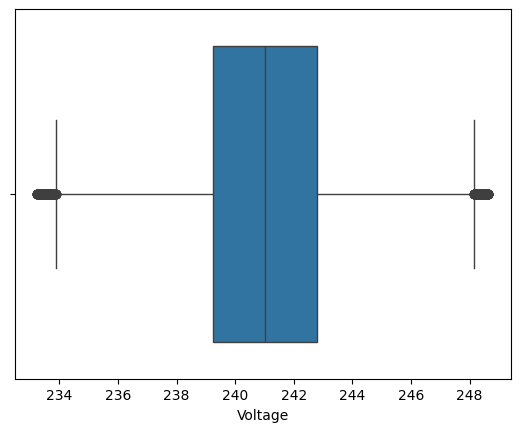

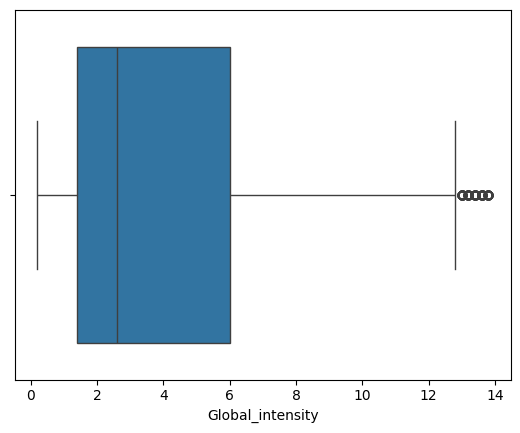

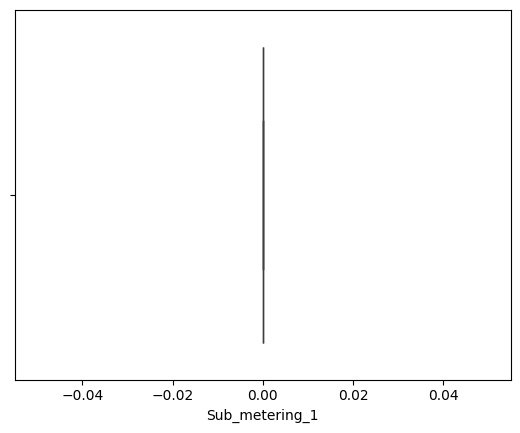

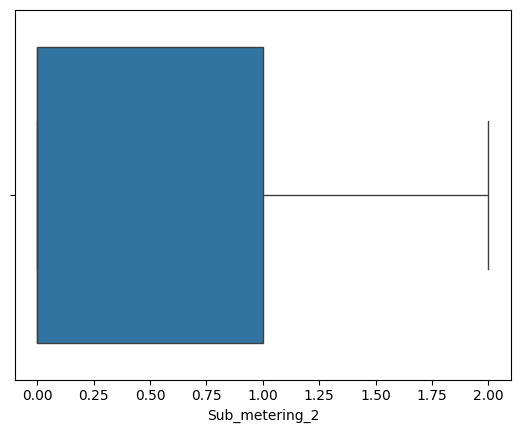

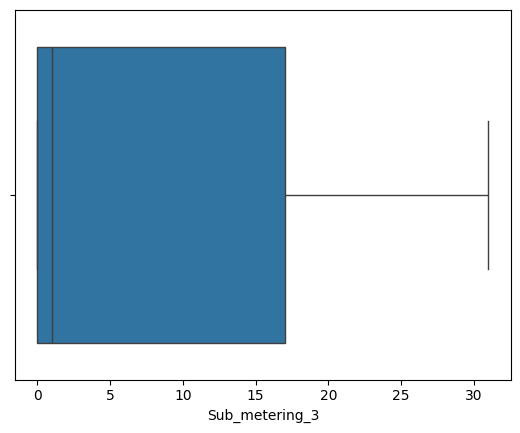

In [29]:
plt.figure(figsize=(10,8))
for i in df_copy.columns:
    plt.subplots()
    sns.boxplot(x=df_copy[i])
plt.show()

In [30]:
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,0.968,0.360,238.12,4.2,0.0,1.0,13.0
1182300,0.484,0.320,241.56,2.4,0.0,1.0,0.0
210728,0.264,0.144,234.02,1.2,0.0,0.0,0.0
1892756,1.058,0.046,238.32,4.4,0.0,1.0,0.0
98065,0.600,0.096,241.01,2.6,0.0,2.0,17.0


In [31]:
x=df_copy.drop("Global_active_power" , axis=1 )
y=df_copy["Global_active_power"]

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x , y , test_size=0.33 , random_state=10)

In [33]:
x_train.shape , x_test.shape

((26477, 6), (13041, 6))

In [34]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_sca_train=scalar.fit_transform(x_train)
x_sca_test=scalar.transform(x_test)

<Axes: >

<Figure size 1000x800 with 0 Axes>

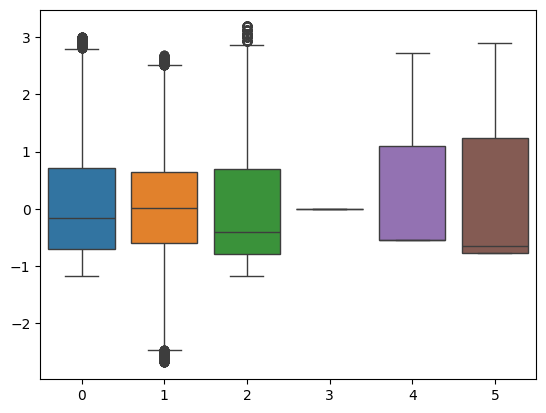

In [35]:
plt.figure(figsize=(10,8))

plt.subplots()
sns.boxplot( x_sca_train)


In [36]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
lasso_reg=Lasso()
lin_reg=LinearRegression()
Ridg_reg=Ridge()
Elas_reg=ElasticNet()


In [37]:
lin_reg.fit(x_sca_train , y_train)
y_lin_reg_predict=lin_reg.predict(x_sca_test)


In [38]:
from sklearn.metrics import  mean_absolute_error , mean_squared_error ,r2_score
print(mean_absolute_error(y_test, y_lin_reg_predict))
mse=mean_squared_error(y_test, y_lin_reg_predict)
print(mse)
r2_score_lin=r2_score(y_test, y_lin_reg_predict)
print(np.sqrt(mse))
print(r2_score_lin)


     

0.03630417580638928
0.02446608218057165
0.15641637440041772
0.9582944628714636


In [39]:
n=x_sca_test.shape[0]
p=x_sca_test.shape[1]
print(1-((1 - r2_score_lin)*(n -1 ) /(n-p-1)))

0.9582752643734759


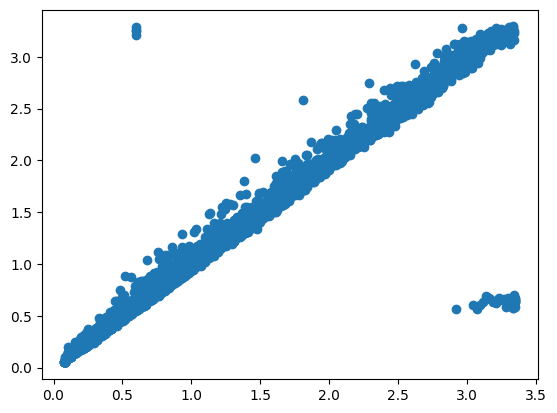

In [40]:
plt.scatter(y_test , y_lin_reg_predict)

In [41]:
residuals=y_test - y_lin_reg_predict

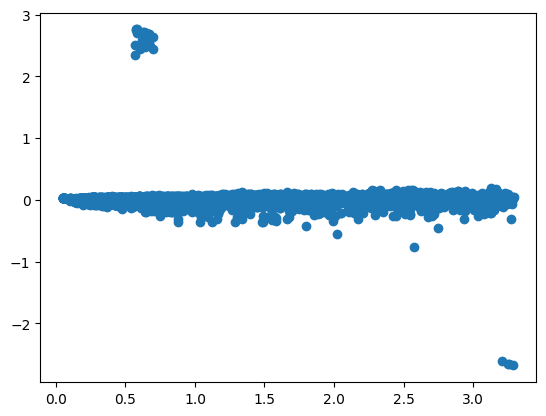

In [42]:
plt.scatter( y_lin_reg_predict , residuals)

In [43]:
elas=ElasticNet()
elas.fit(x_sca_train , y_train)
y_elas_predic=elas.predict(x_sca_test)
print(mean_absolute_error(y_test , y_elas_predic))
mse_elas=mean_squared_error(y_test , y_elas_predic)
print(mse_elas)
print(np.sqrt(mse_elas))    

0.513522212664412
0.3669444186662242
0.6057593735686012


In [44]:
r2_elas=r2_score(y_test , y_elas_predic)
print(r2_elas)
print(1-((1 - r2_elas)*(n -1 ) /(n-p-1)))
      

0.3744967435388603
0.3742088028039542


In [45]:
lasso_reg.fit(x_sca_train , y_train)
y_lass_predic=lasso_reg.predict(x_sca_test)
print(mean_absolute_error(y_test , y_lass_predic))
mse_lasso=mean_squared_error(y_test ,y_lass_predic)
print(mse_lasso)
print(np.sqrt(mse_lasso)) 
r2_lasso=r2_score(y_test , y_lass_predic)
print(r2_lasso)
print(1-((1 - r2_lasso)*(n -1 ) /(n-p-1)))


0.6520669907458922
0.586695360489941
0.7659604170516522
-9.658103263965323e-05
-0.0005569600019657006


In [46]:
Ridg_reg.fit(x_sca_train , y_train)
y_Ridge_predic=Ridg_reg.predict(x_sca_test)
print(mean_absolute_error(y_test ,y_Ridge_predic ))
mse_Ridge=mean_squared_error(y_test ,y_Ridge_predic)
print(mse_Ridge)
print(np.sqrt(mse_Ridge)) 
r2_Ridge=r2_score(y_test , y_Ridge_predic)
print(r2_Ridge)
print(1-((1 - r2_Ridge)*(n -1 ) /(n-p-1)))


0.03631369522366844
0.024465804477017104
0.15641548669175026
0.9582949362523596
0.9582757379722855


In [47]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_sca_train , y_train)
model_predict=model.predict(x_sca_test)
mae_model=mean_absolute_error(y_test , model_predict)
mse_model=mean_squared_error(y_test , model_predict)
rmse_model=np.sqrt(mse_model)
r2_model=r2_score(y_test , model_predict)
adj_rsquared=1-((1 - r2_model)*(n -1 ) /(n-p-1))

In [49]:
print(mae_model)
print(mse_model)
print(r2_model)
print(adj_rsquared)
print(rmse_model)

0.05227479102310693
0.025345036914003295
0.9567961731576105
0.9567762849451619
0.15920124658432577


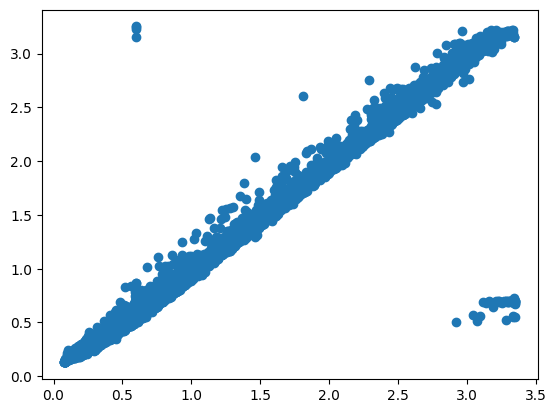

In [50]:
plt.scatter(y_test, model_predict)

In [51]:
residual_model=y_test - model_predict

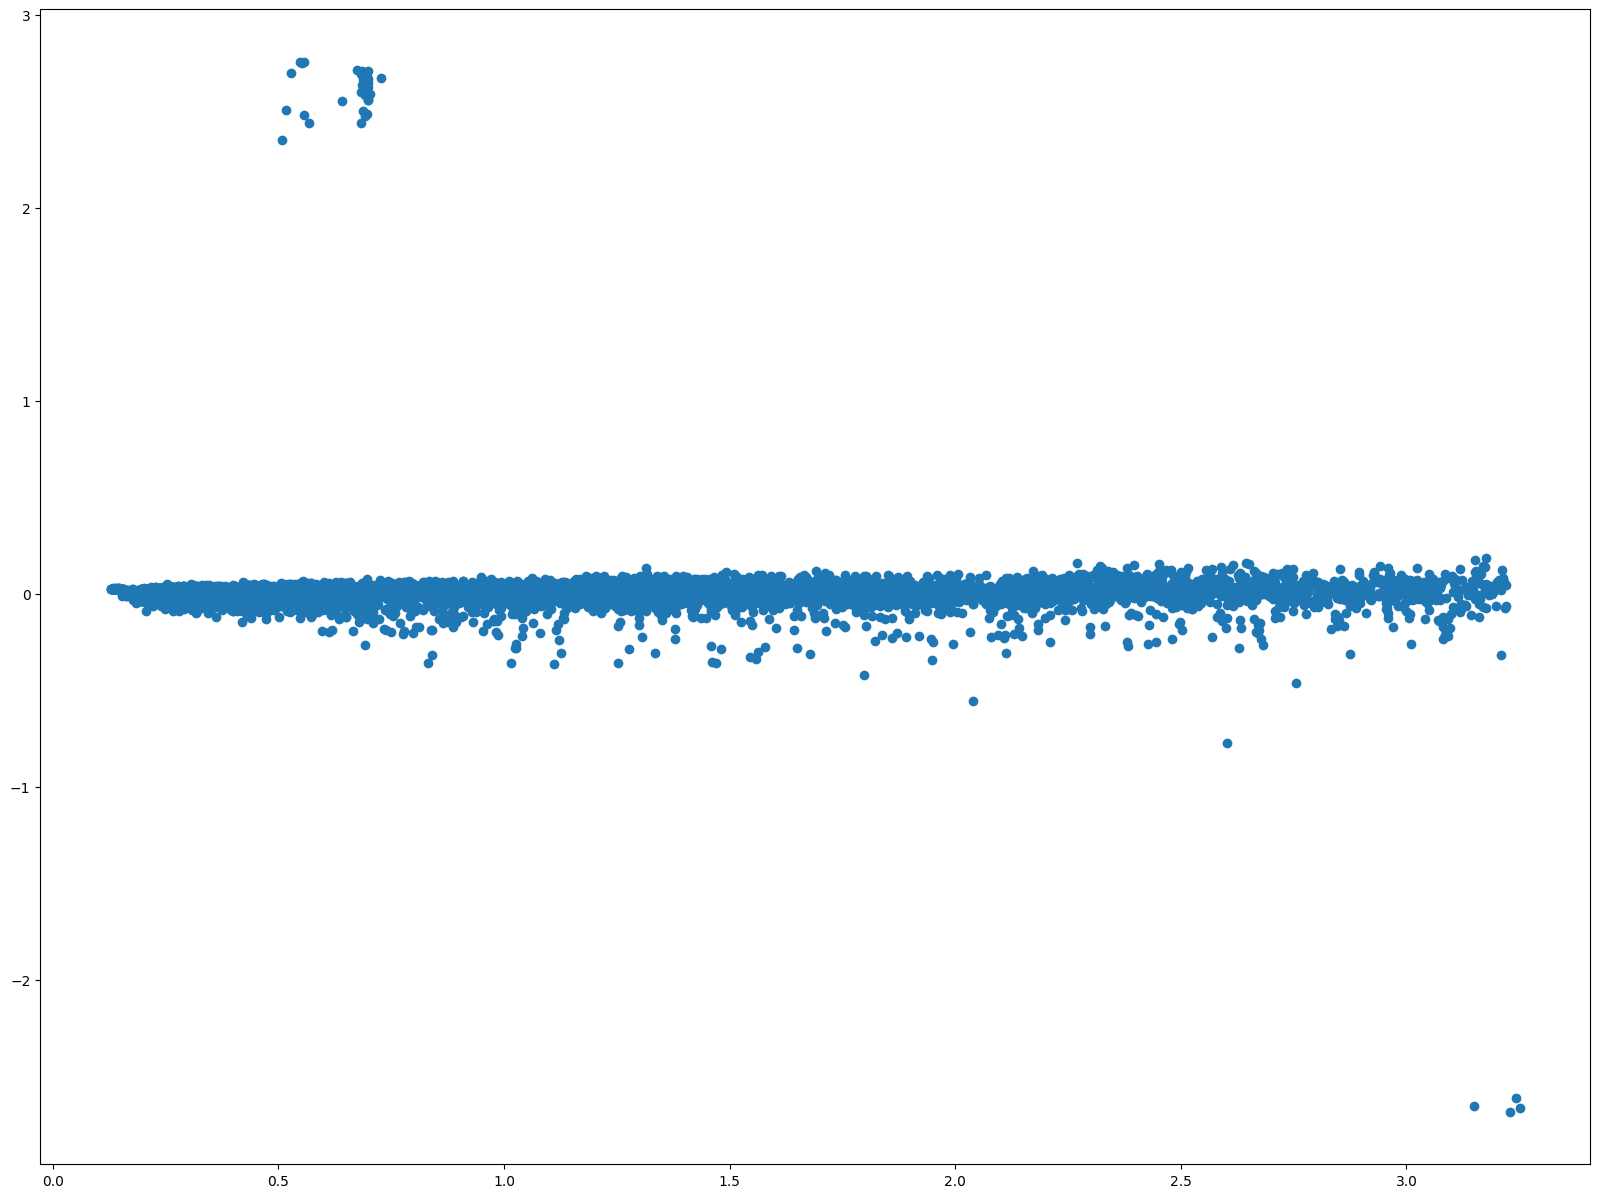

In [58]:
plt.figure(figsize=(20,15))
plt.scatter(y=residuals , x=model_predict)

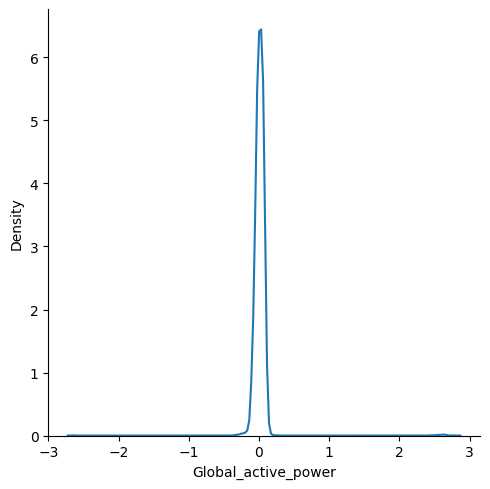

In [57]:
sns.displot(residual_model , kind="kde")

<Axes: xlabel='Global_intensity', ylabel='Global_active_power'>

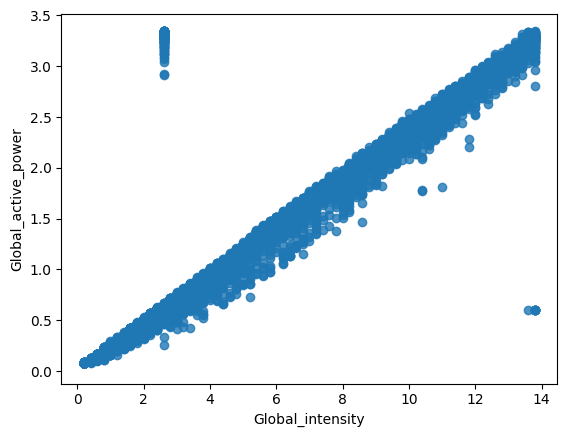

In [65]:
sns.regplot(data=df_copy , x="Global_intensity" , y="Global_active_power")

In [59]:
df_copy.head(x="V)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
861863,0.968,0.360,238.12,4.2,0.0,1.0,13.0
1182300,0.484,0.320,241.56,2.4,0.0,1.0,0.0
210728,0.264,0.144,234.02,1.2,0.0,0.0,0.0
1892756,1.058,0.046,238.32,4.4,0.0,1.0,0.0
98065,0.600,0.096,241.01,2.6,0.0,2.0,17.0
